In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Challenge_2

Mounted at /gdrive
/gdrive/My Drive/Challenge_2


In [ ]:
# Fix randomness and hide warnings
seed = 42

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["PYTHONHASHSEED"] = str(seed)
os.environ["MPLCONFIGDIR"] = os.getcwd() + "/configs/"

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import numpy as np
np.random.seed(seed)
import logging
import random
random.seed(seed)
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc("font", size=16)


In [ ]:
dataset = np.load('training_data.npy', allow_pickle=True)
print(dataset.shape)

valid_periods = np.load('valid_periods.npy', allow_pickle=True)
print(valid_periods.shape)

categories = np.load('categories.npy', allow_pickle=True)
print(categories.shape)

(48000, 2776)
(48000, 2)
(48000,)


In [ ]:
# Creating a new dataset containing only time series of the given category
def createNewDatasetByCategory(dataset, categories, category, validPeriods):
  newDataset = []
  newValidPeriods = []
  idxs = [i for i, x in enumerate(categories) if x == category]
  for idx in idxs:
    newDataset.append(dataset[idx])
    newValidPeriods.append(validPeriods[idx])
  return newDataset, newValidPeriods

In [ ]:
# We take category A as an example here
dataset_A, valid_periods_A = createNewDatasetByCategory(dataset , categories, 'A', valid_periods)
print(len(dataset_A), len(valid_periods_A))

5728 5728


In [ ]:
# Extract the non zero part of the time series
def extract_current_serie(time_serie, valid_period):
  start = valid_period[0]
  end = valid_period[1]
  return time_serie[start:end]

The autocorrelation of a time series measures the similarity between observations at different points in time as a function of lag. It indicates the extent to which an observation at one point in time is correlated with an observation at another point in time, shifted by a few steps.

Let us plot the autorrelation function for a a few time series, as well as their lenght, and see if it can help us choose a window size of our sequences.

shape of time series : 
0 (240,)
520 (313,)
1041 (288,)
1561 (288,)
2082 (288,)
2603 (414,)
3123 (166,)
3644 (316,)
4165 (184,)
4685 (333,)
5206 (184,)
5727 (100,)


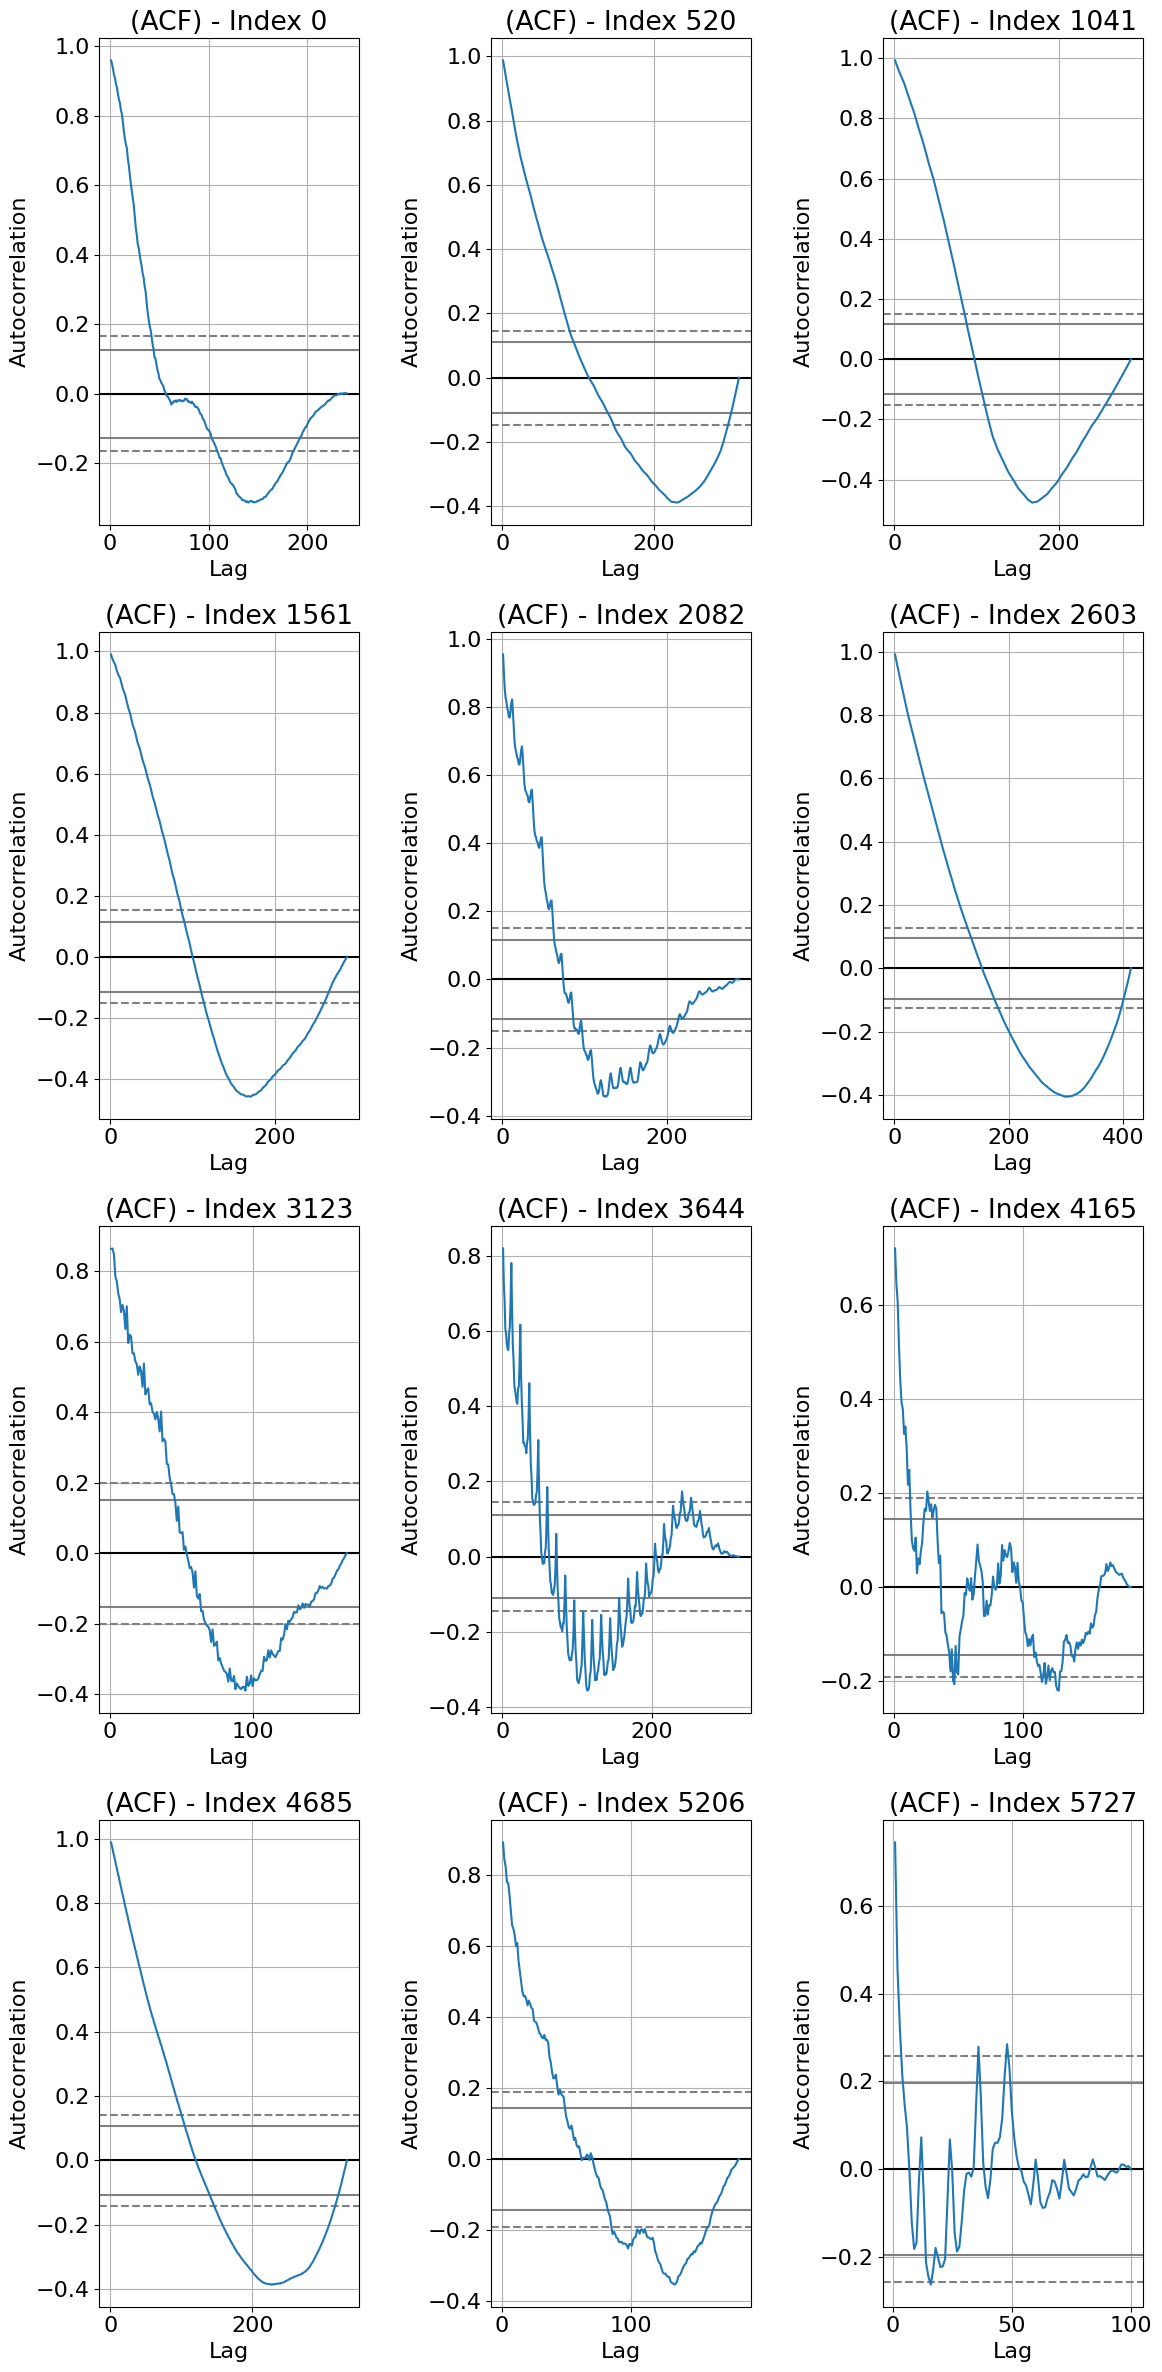

In [ ]:
indexes = np.linspace(0, len(dataset_A)-1, 12, dtype=int)

# Calculate the number of rows and columns for the subplots
num_plots = len(indexes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axs array if it's a 2D array
axs = axs.flatten() if num_rows > 1 else [axs]

print("shape of time series : ")
# Iterate over desired indices and create ACF plots
for i, index in enumerate(indexes):
    current_serie = extract_current_serie(dataset_A[index], valid_periods_A[index])

    # Example for calculating autocorrelation using Pandas
    ts_series = pd.Series(current_serie)
    print(index,ts_series.shape)

    # Plot ACF on the i-th subplot
    pd.plotting.autocorrelation_plot(ts_series, ax=axs[i])
    axs[i].set_title(f'(ACF) - Index {index}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


According to its definition, the lags corresponding to significant autocorrelation can account for certain patterns or trends in our time series. We could consider the lags of the extrema (different from zero) to fix our window size, but they differ for each time serie.

If we roughly consider these minima, we can assume that in a majority of cases, a window size of 100 is sufficient to frame the patterns.